In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
#Problem1
#generating initial conditions
price = 1
sigma = 0.5
mean = 0
#generating random r following normal distribution
r = np.random.normal(mean, sigma, 1000)

In [100]:
# Classical Brownian Motion
price_brownian = price + r
print(np.mean(price_brownian))
print(np.std(price_brownian))

0.9827998270749101
0.5080949550473078


In [101]:
# Arithmetic Return System
price_arithmetic = price * (1 + r)
print(np.mean(price_arithmetic))
print(np.std(price_arithmetic))

0.9827998270749101
0.5080949550473078


In [102]:
# Log Return or Geometric Brownian Motion
price_log = price * np.exp(r)
print(np.mean(price_log))
print(np.std(price_log))

1.1161216498626223
0.594507200252909


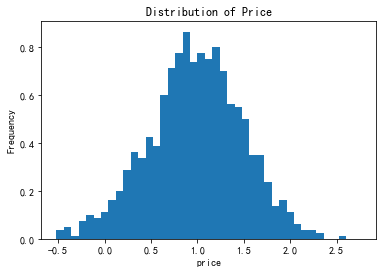

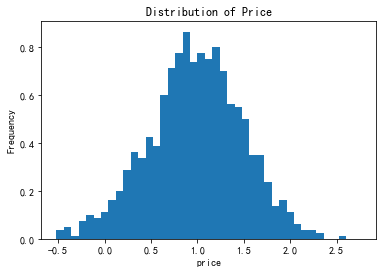

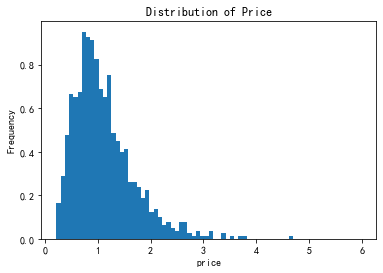

In [103]:
data = [price_brownian, price_arithmetic, price_log]
for data in data:
    plt.hist(data, bins=np.arange(min(data), max(data), 0.08), density = True)
    plt.xlabel('price')
    plt.ylabel('Frequency')
    plt.title('Distribution of Price')
    plt.show()

In [105]:
#Problem 2

data = pd.read_csv('DailyPrices.csv')
data.head()

,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2/14/2022 0:00,432.011322,167.863144,292.261475,155.167007,291.920013,135.526001,135.300003,217.699997,242.443298,...,197.263107,64.592575,46.290192,151.118790,58.443172,377.068665,247.324020,48.182598,60.352272,66.789505
1,2/15/2022 0:00,438.978333,171.749573,297.680664,156.510498,307.476654,136.608505,136.425507,221.000000,264.702484,...,199.789520,64.328896,46.502743,159.029022,58.653572,372.440185,255.490829,49.446892,62.076630,67.673614
2,2/16/2022 0:00,439.470337,171.511032,297.333191,158.100494,307.796661,137.738007,137.487503,216.539993,264.862305,...,201.139511,64.172638,46.770744,165.211960,59.198696,377.000458,256.349976,50.203476,61.990410,65.915215
3,2/17/2022 0:00,430.082642,167.863144,288.626679,154.652496,292.116669,132.539002,132.308502,207.710007,244.841064,...,194.109894,64.514450,47.473091,157.448944,58.615318,378.822571,248.439911,48.600708,59.921181,64.019295
4,2/18/2022 0:00,427.297852,166.292648,285.846893,152.601502,285.660004,130.403000,130.467499,206.160004,236.199127,...,193.984528,64.455841,47.815025,157.380234,58.385788,376.571686,245.042847,48.381695,59.700851,64.981995


In [126]:
def return_calculate(price, method = 'discrete'):
    returns = []
    for i in range(len(price)-1):
        returns.append(price[i+1]/price[i])
    returns = np.array(returns)
    if method == 'discrete':
        return returns - 1
    if method == 'log':
        return np.log(returns)

In [132]:
data = data.drop(['Date'], axis = 1)
return1 = pd.DataFrame()
for column in data.columns:
    returns = return_calculate(data[column], method = 'discrete')
    return1[column] = returns
    

return1.head()

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
1,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
2,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
3,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
4,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,-0.002033,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605


In [136]:
#Removing mean from META
meta = return1["META"]
meta = meta-np.mean(meta)

In [137]:
def calculate_var(data, alpha=0.05):
  return -np.quantile(data, alpha)

In [166]:
# Calculate VAR using a normal distribution
sigma = np.sqrt(np.var(meta))
norm = np.random.normal(0, sigma, 1000)
var_norm = calculate_var(norm, alpha=0.05)
print(round(var_norm*100,2), '%')

6.41 %


In [145]:
# from week 03
def weight_gen(n, lambd):
    weight = np.zeros(n)
    for i in range(n):
        weight[i] = (1-lambd) * (lambd) ** i
    normalized_weight = weight / np.sum(weight)
    return normalized_weight[::-1]

def cov_gen(data, weight):
    data = data - data.mean()
    weight = np.diag(weight)
    data_left = weight@data
    data_right = np.dot(data.T,data_left)
    return data_right

In [172]:
# Calculate VAR using a normal distribution with an Exponentially Weighted variance lambda = 0.94
weight = weight_gen(len(meta), 0.94)
cov = cov_gen(np.matrix(meta).T, weight)
sigma = np.sqrt(cov[0,0])
norm = np.random.normal(0, sigma, 1000)
var_ew_norm = calculate_var(norm, alpha=0.05)
print(round(var_ew_norm*100,2), '%')

9.3 %


In [163]:
# Calculate VAR using an MLE fitted T distribution
from scipy.stats import t
result = t.fit(meta, method="MLE")
df = result[0]
loc = result[1]
scale = result[2]
simulation_t = t(df, loc, scale).rvs(1000)
var_t = calculate_var(simulation_t)
print(round(var_t*100,2), '%') 

5.69 %


In [174]:
# Calculate VAR using a fitted AR(1) model
from statsmodels.tsa.arima.model import ARIMA
#fitting AR(1) model
model = ARIMA(meta, order=(1,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   META   No. Observations:                  248
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 447.619
Date:                Fri, 17 Feb 2023   AIC                           -889.238
Time:                        17:59:57   BIC                           -878.697
Sample:                             0   HQIC                          -884.995
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.766e-06      0.003     -0.001      0.999      -0.005       0.005
ar.L1          0.0072      0.081      0.089      0.929      -0.152       0.167
sigma2         0.0016   6.67e-05     23.739      0.0

In [182]:
sigma = np.sqrt(res.params['sigma2'])
norm = np.random.normal(0, sigma, 1000)
ar1_norm = calculate_var(norm, alpha=0.05)
print(round(ar1_norm*100,2), '%')

6.26 %


In [164]:
# Calculate VAR using a Historic Simulation
var_historic = calculate_var(meta)
print(round(var_historic*100,2), '%')

5.46 %


In [184]:
#Problem 3
portfolio = pd.read_csv('portfolio.csv')
print(portfolio.shape)
portfolio.head()

(99, 3)


,Portfolio,Stock,Holding
0,A,AAPL,58
1,A,TSLA,10
2,A,JPM,64
3,A,HD,27
4,A,BAC,209


In [189]:
data = pd.read_csv('DailyPrices.csv')
data.head()

,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2/14/2022 0:00,432.011322,167.863144,292.261475,155.167007,291.920013,135.526001,135.300003,217.699997,242.443298,...,197.263107,64.592575,46.290192,151.118790,58.443172,377.068665,247.324020,48.182598,60.352272,66.789505
1,2/15/2022 0:00,438.978333,171.749573,297.680664,156.510498,307.476654,136.608505,136.425507,221.000000,264.702484,...,199.789520,64.328896,46.502743,159.029022,58.653572,372.440185,255.490829,49.446892,62.076630,67.673614
2,2/16/2022 0:00,439.470337,171.511032,297.333191,158.100494,307.796661,137.738007,137.487503,216.539993,264.862305,...,201.139511,64.172638,46.770744,165.211960,59.198696,377.000458,256.349976,50.203476,61.990410,65.915215
3,2/17/2022 0:00,430.082642,167.863144,288.626679,154.652496,292.116669,132.539002,132.308502,207.710007,244.841064,...,194.109894,64.514450,47.473091,157.448944,58.615318,378.822571,248.439911,48.600708,59.921181,64.019295
4,2/18/2022 0:00,427.297852,166.292648,285.846893,152.601502,285.660004,130.403000,130.467499,206.160004,236.199127,...,193.984528,64.455841,47.815025,157.380234,58.385788,376.571686,245.042847,48.381695,59.700851,64.981995


In [185]:
portfolioA = portfolio[portfolio['Portfolio'] == 'A']
portfolioB = portfolio[portfolio['Portfolio'] == 'B']
portfolioC = portfolio[portfolio['Portfolio'] == 'C']
print(portfolioA.shape)
print(portfolioB.shape)
print(portfolioC.shape)

(35, 3)
(32, 3)
(32, 3)


In [186]:
portfolioA.head()

,Portfolio,Stock,Holding
0,A,AAPL,58
1,A,TSLA,10
2,A,JPM,64
3,A,HD,27
4,A,BAC,209


In [213]:
def portfolio_pv(data, portfolio):
    pv = []
    for stock in portfolio['Stock']:
        pv.append(data.iloc[-1][stock])
    return np.array(pv)

In [231]:
def weight(data, portfolio):
    total = np.sum(portfolio['Holding']*100*portfolio_pv(data, portfolio))
    weight =[]
    for stock in portfolio['Stock']:
        weight.append(portfolio[portfolio['Stock'] == stock]['Holding']*100*data.iloc[-1][stock]/total)
    return weight

In [243]:
def calculate_return(price, method = 'discrete'):
    if method == 'discrete':
        return price.pct_change()
    if method == 'log':
        return np.log(price / price.shift(1))

In [254]:
def cov_ew(data, portfolio, method = 'discrete'):
    price = data[portfolio['Stock'].values]
    returns = calculate_return(price, method = method)
    weight = weight_gen(len(returns.dropna().iloc[0:]), 0.94)
    cov = cov_gen(returns.dropna(), weight)
    return cov


In [266]:
portfolio = [portfolioA, portfolioB, portfolioC]
sumtotal = 0
z_score = 1.645
for portfolio in portfolio:
    holding = portfolio['Holding']*100
    pv = portfolio_pv(data, portfolio)
    cov_matrix = cov_ew(data, portfolio, method = 'discrete')
    weights = np.array(weight(data, portfolio))
    middle = np.dot(cov_matrix, weights)
    var = np.dot(weights.T, middle)
    present = np.sum(pv * holding)
    total = present * z_score * np.sqrt(var)
    total = round(total[0][0],2)
    sumtotal+=total
    print('VaR for portfolio', portfolio['Portfolio'].iloc[0], 'is $', total)
print('VaR for total portfolio is $', sumtotal)

VaR for portfolio A is $ 567070.75
VaR for portfolio B is $ 449499.84
VaR for portfolio C is $ 378692.6
VaR for total portfolio is $ 1395263.19


In [272]:
portfolio = [portfolioA, portfolioB, portfolioC]
sumtotal = 0
for portfolio in portfolio:
    holding = portfolio['Holding']*100
    pv = portfolio_pv(data, portfolio)
    price = data[portfolio['Stock'].values]
    returns = calculate_return(price, method = 'log')
    cov_matrix = returns.cov()
    weights = np.array(weight(data, portfolio))
    middle = np.dot(cov_matrix, weights)
    var = np.dot(weights.T, middle)
    present = np.sum(pv * holding)
    total = present * np.sqrt(var)
    total = round(total[0][0],2)
    sumtotal+=total
    print('VaR for portfolio', portfolio['Portfolio'].iloc[0], 'is $', total)
print('VaR for total portfolio is $', round(sumtotal,2))

VaR for portfolio A is $ 482785.48
VaR for portfolio B is $ 406016.58
VaR for portfolio C is $ 342785.35
VaR for total portfolio is $ 1231587.41
